In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from factor_analyzer import FactorAnalyzer

# Model Building

### Get the cleaned and pivotted files for each measure category
### Apply weights (multiply by 22 or 4 as per deloite case study
### Merge the Data frames on provider id 
### Get the target variable from Hospital General Information file - 'Hospital Overall Rating'
### Apply Quantile transformer to normalize the data 
### Apply RFE and Build Liniear model

In [2]:
Efficiency_df=pd.read_csv("Efficiency_score_supervised_model.csv")
Mortality_df=pd.read_csv("Mortality_supervised_model.csv")
Readmission_df=pd.read_csv("Readmission_supervised_model.csv")
PatientExp_df=pd.read_csv("Patient_exp_score_supervised_model.csv")
SafetyOfCare_df=pd.read_csv("SafetyOfCare_supervised_model.csv")
EffectivenessOfCare_df=pd.read_csv("EffectivenessOfCare_supervised_model.csv")
TimelinessOfCare_df=pd.read_csv("TimelinessOfCare_supervised_model.csv")

In [3]:
SafetyOfCare_df.head()

Unnamed: 0  Provider ID  HAI_1_SIR  HAI_2_SIR  HAI_3_SIR  HAI_4_SIR  \
0           0        10001    0.06960    0.11416    0.11220        0.0   
1           1        10005    0.04248    0.03648    0.02316        0.0   
2           2        10006    0.01364    0.05128    0.01860        0.0   
3           3        10007    0.00000    0.00000    0.00000        0.0   
4           4        10008    0.00000    0.00000    0.00000        0.0   

   HAI_5_SIR  COMP_HIP_KNEE  PSI_90_SAFETY  SafetyOfCare_score  
0    0.00422          0.456         0.4420            0.149773  
1    0.01388          0.360         0.5525            0.128562  
2    0.01261          0.456         0.5915            0.142954  
3    0.00000          0.000         0.5135            0.064188  
4    0.00000          0.000         0.5850            0.073125

In [4]:
Efficiency_df=Efficiency_df.drop('Unnamed: 0',axis=1)
Mortality_df=Mortality_df.drop('Unnamed: 0',axis=1)
Readmission_df=Readmission_df.drop('Unnamed: 0',axis=1)
PatientExp_df=PatientExp_df.drop('Unnamed: 0',axis=1)
SafetyOfCare_df=SafetyOfCare_df.drop('Unnamed: 0',axis=1)
EffectivenessOfCare_df=EffectivenessOfCare_df.drop('Unnamed: 0',axis=1)
TimelinessOfCare_df=TimelinessOfCare_df.drop('Unnamed: 0',axis=1)

In [5]:
print(Efficiency_df.columns)
print(Mortality_df.columns)
print(Readmission_df.columns)
print(PatientExp_df.columns)
print(SafetyOfCare_df.columns)
print(EffectivenessOfCare_df.columns)
print(TimelinessOfCare_df.columns)

Index(['Provider ID', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'Efficiency_score'],
      dtype='object')
Index(['Provider ID', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP',
       'Mort_score'],
      dtype='object')
Index(['Provider ID', 'READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'Readmission_score'],
      dtype='object')
Index(['Provider ID', 'H_CLEAN_STAR_RATING', 'H_COMP_1_STAR_RATING',
       'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING', 'H_COMP_4_STAR_RATING',
       'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING', 'H_COMP_7_STAR_RATING',
       'H_HSP_RATING_STAR_RATING', 'H_QUIET_STAR_RATING',
       'H_RECMND_STAR_RATING', 'Patent_exp_score'],
      dtype='object')
Index(['Provider ID', 'HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR',
       'HAI_5_SIR', 'COMP_HIP_KNEE', 'PSI_90_SAFET

In [6]:
Efficiency_df['Efficiency_score'] = Efficiency_df['Efficiency_score']* 0.04
Mortality_df['Mort_score'] = Mortality_df['Mort_score']* 0.22
Readmission_df['Readmission_score'] = Readmission_df['Readmission_score']* 0.22
PatientExp_df['Patent_exp_score'] = PatientExp_df['Patent_exp_score']* 0.22
SafetyOfCare_df['SafetyOfCare_score'] = SafetyOfCare_df['SafetyOfCare_score']* 0.22
EffectivenessOfCare_df['EffectivenessOfCare_score'] = EffectivenessOfCare_df['EffectivenessOfCare_score']* 0.04
TimelinessOfCare_df['TimelinessOfCare_score'] = TimelinessOfCare_df['TimelinessOfCare_score']* 0.04


In [7]:
df= pd.merge(Efficiency_df, Mortality_df, on='Provider ID', how='outer')
df= pd.merge(df, Readmission_df, on='Provider ID', how='outer')
df= pd.merge(df, PatientExp_df, on='Provider ID', how='outer')
df= pd.merge(df, SafetyOfCare_df, on='Provider ID', how='outer')
df= pd.merge(df, EffectivenessOfCare_df, on='Provider ID', how='outer')
Final_df= pd.merge(df, TimelinessOfCare_df, on='Provider ID', how='outer')

In [8]:
Final_df.columns

Index(['Provider ID', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'Efficiency_score', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP',
       'Mort_score', 'READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'Readmission_score', 'H_CLEAN_STAR_RATING',
       'H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING', 'H_COMP_3_STAR_RATING',
       'H_COMP_4_STAR_RATING', 'H_COMP_5_STAR_RATING', 'H_COMP_6_STAR_RATING',
       'H_COMP_7_STAR_RATING', 'H_HSP_RATING_STAR_RATING',
       'H_QUIET_STAR_RATING', 'H_RECMND_STAR_RATING', 'Patent_exp_score',
       'HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR',
       'COMP_HIP_KNEE', 'PSI_90_SAFETY', 'SafetyOfCare_score', 'CAC_3',
       'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23', 'OP_29', 'OP_30',
       'OP_4', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8', 

In [9]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 4598
Data columns (total 71 columns):
Provider ID                  4599 non-null int64
OP_10                        3779 non-null float64
OP_11                        3779 non-null float64
OP_13                        3779 non-null float64
OP_14                        3779 non-null float64
OP_8                         3779 non-null float64
Efficiency_score             3779 non-null float64
MORT_30_AMI                  4125 non-null float64
MORT_30_CABG                 4125 non-null float64
MORT_30_COPD                 4125 non-null float64
MORT_30_HF                   4125 non-null float64
MORT_30_PN                   4125 non-null float64
MORT_30_STK                  4125 non-null float64
PSI_4_SURG_COMP              4125 non-null float64
Mort_score                   4125 non-null float64
READM_30_AMI                 4405 non-null float64
READM_30_CABG                4405 non-null float64
READM_30_COPD               

In [10]:
# Check the data for percentage of null values

round((Final_df.isnull().sum()/Final_df.isnull().count())*100,2)

Provider ID                   0.00
OP_10                        17.83
OP_11                        17.83
OP_13                        17.83
OP_14                        17.83
OP_8                         17.83
Efficiency_score             17.83
MORT_30_AMI                  10.31
MORT_30_CABG                 10.31
MORT_30_COPD                 10.31
MORT_30_HF                   10.31
MORT_30_PN                   10.31
MORT_30_STK                  10.31
PSI_4_SURG_COMP              10.31
Mort_score                   10.31
READM_30_AMI                  4.22
READM_30_CABG                 4.22
READM_30_COPD                 4.22
READM_30_HF                   4.22
READM_30_HIP_KNEE             4.22
READM_30_HOSP_WIDE            4.22
READM_30_PN                   4.22
READM_30_STK                  4.22
Readmission_score             4.22
H_CLEAN_STAR_RATING          23.81
H_COMP_1_STAR_RATING         23.81
H_COMP_2_STAR_RATING         23.81
H_COMP_3_STAR_RATING         23.81
H_COMP_4_STAR_RATING

In [11]:
Final_df.fillna(0, inplace=True)

In [12]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 4598
Data columns (total 71 columns):
Provider ID                  4599 non-null int64
OP_10                        4599 non-null float64
OP_11                        4599 non-null float64
OP_13                        4599 non-null float64
OP_14                        4599 non-null float64
OP_8                         4599 non-null float64
Efficiency_score             4599 non-null float64
MORT_30_AMI                  4599 non-null float64
MORT_30_CABG                 4599 non-null float64
MORT_30_COPD                 4599 non-null float64
MORT_30_HF                   4599 non-null float64
MORT_30_PN                   4599 non-null float64
MORT_30_STK                  4599 non-null float64
PSI_4_SURG_COMP              4599 non-null float64
Mort_score                   4599 non-null float64
READM_30_AMI                 4599 non-null float64
READM_30_CABG                4599 non-null float64
READM_30_COPD               

In [13]:
Final_df_targetScore = Final_df[['Provider ID','Efficiency_score','Mort_score',
                                         'Readmission_score','Patent_exp_score','SafetyOfCare_score',
                                         'EffectivenessOfCare_score','TimelinessOfCare_score']]

In [14]:
Final_df_targetScore.head()

Provider ID  Efficiency_score  Mort_score  Readmission_score  \
0        10001          0.059312    0.770402           0.452650   
1        10005          0.120216    0.839457           0.411290   
2        10006          0.101424    0.897487           0.438130   
3        10007          0.142456    0.319597           0.356758   
4        10008          0.018912    0.212457           0.309843   

   Patent_exp_score  SafetyOfCare_score  EffectivenessOfCare_score  \
0            0.0620            0.032950                   0.134511   
1            0.0630            0.028284                   0.154800   
2            0.0538            0.031450                   0.127978   
3            0.0718            0.014121                   0.076333   
4            0.0000            0.016088                   0.047244   

   TimelinessOfCare_score  
0                0.779029  
1                0.604457  
2                0.578571  
3                0.599543  
4                0.470971

In [15]:
#Final_df_targetScore['Star_rating_score'] = Final_df_targetScore['Patent_exp_score']+ Final_df_targetScore['EffectivenessOfCare_score']+ Final_df_targetScore['Efficiency_score']- Final_df_targetScore['Mort_score']- Final_df_targetScore['Readmission_score']- Final_df_targetScore['SafetyOfCare_score']- Final_df_targetScore['TimelinessOfCare_score']

In [16]:
#Final_df_targetScore['Star_rating_score'].max()

In [17]:
#Final_df_targetScore['Star_rating_score'].min()

In [18]:
#Final_df_targetScore_copy = Final_df_targetScore.copy()

In [19]:
# from sklearn.preprocessing import QuantileTransformer

In [20]:
# Final_df_targetScore=Final_df_targetScore.drop(['Provider ID'],axis=1)
# list=Final_df_targetScore.columns.tolist()

In [21]:
# # Standardize data 
# from sklearn.preprocessing import StandardScaler
# standard_scaler = StandardScaler()
# final_stand = pd.DataFrame(standard_scaler.fit_transform(Final_df_targetScore),columns = Final_df_targetScore.columns)


In [22]:
# final_stand['Star_rating_score'].max()

In [23]:
# final_stand['Star_rating_score'].min()

In [24]:
# Final_df_targetScore.loc[Final_df_targetScore['Star_rating_score']<=-2.5,'Star_rating'] = 1
# Final_df_targetScore.loc[(Final_df_targetScore['Star_rating_score'] > -2.5) & (Final_df_targetScore['Star_rating_score'] <= -1.7),'Star_rating'] = 2
# Final_df_targetScore.loc[(Final_df_targetScore['Star_rating_score'] > -1.7) & (Final_df_targetScore['Star_rating_score'] <= -0.9),'Star_rating'] = 3
# Final_df_targetScore.loc[(Final_df_targetScore['Star_rating_score'] > -0.9) & (Final_df_targetScore['Star_rating_score'] <= 0.2),'Star_rating'] = 4
# Final_df_targetScore.loc[(Final_df_targetScore['Star_rating_score'] > 0.2) & (Final_df_targetScore['Star_rating_score'] <= 0.5),'Star_rating'] = 5


# Unsupervised lerning - clustering

In [25]:
dfa=pd.read_csv("Mortality_clustering.csv")
dfb=pd.read_csv("Readmission_clustering.csv")
dfc=pd.read_csv("TimelinessOfCare_clustering.csv")
dfd=pd.read_csv("SafetyOfCare_clustering.csv")
dfe=pd.read_csv("EffectivenessOfCare_clustering.csv")
dff=pd.read_csv("Patient_exp_clustering.csv")
dfg=pd.read_csv("Efficiency_clustering.csv")

In [26]:
dfa=dfa.drop('Unnamed: 0',axis=1)
dfb=dfb.drop('Unnamed: 0',axis=1)
dfc=dfc.drop('Unnamed: 0',axis=1)
dfd=dfd.drop('Unnamed: 0',axis=1)
dfe=dfe.drop('Unnamed: 0',axis=1)
dff=dff.drop('Unnamed: 0',axis=1)
dfg=dfg.drop('Unnamed: 0',axis=1)

In [27]:
dfa.head()

Provider ID  MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  \
0        10001         12.5           4.2           9.3        12.4   
1        10005         16.0           0.0           7.6        15.5   
2        10006         16.7           4.1           7.1        15.6   
3        10007          0.0           0.0           9.3        14.4   
4        10008          0.0           0.0           8.2        12.7   

   MORT_30_PN  MORT_30_STK  PSI_4_SURG_COMP  
0        15.5         15.4           168.26  
1        20.8         15.5           179.05  
2        18.2         17.9           198.33  
3        18.8         16.6             0.00  
4        15.7          0.0             0.00

In [28]:
dfcl= pd.merge(dfa, dfb, on='Provider ID', how='outer')
dfcl= pd.merge(dfcl, dfc, on='Provider ID', how='outer')
dfcl= pd.merge(dfcl, dfd, on='Provider ID', how='outer')
dfcl= pd.merge(dfcl, dfe, on='Provider ID', how='outer')
dfcl= pd.merge(dfcl, dff, on='Provider ID', how='outer')
Final_clust_df= pd.merge(dfcl, dfg, on='Provider ID', how='outer')

In [29]:
#dfcl = df.drop(['Hospital overall rating','Provider ID'], axis=1)

In [30]:
Final_clust_df=Final_clust_df.fillna(0)

In [31]:
Final_clust_df_copy= Final_clust_df.copy()
Final_clust_df.drop(['Provider ID'],axis=1,inplace=True)

In [32]:
# from sklearn import preprocessing
# pca_scaler = preprocessing.StandardScaler().fit(Final_clust_df)
# country_std=pca_scaler.transform(Final_clust_df) 

# Standardize data 
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
final_stand = pd.DataFrame(standard_scaler.fit_transform(Final_clust_df),columns = Final_clust_df.columns)


In [33]:
final_stand.shape

(4599, 64)

In [34]:
print(final_stand.isnull().sum()*100/final_stand.shape[0])

MORT_30_AMI                 0.0
MORT_30_CABG                0.0
MORT_30_COPD                0.0
MORT_30_HF                  0.0
MORT_30_PN                  0.0
MORT_30_STK                 0.0
PSI_4_SURG_COMP             0.0
READM_30_AMI                0.0
READM_30_CABG               0.0
READM_30_COPD               0.0
READM_30_HF                 0.0
READM_30_HIP_KNEE           0.0
READM_30_HOSP_WIDE          0.0
READM_30_PN                 0.0
READM_30_STK                0.0
ED_1b                       0.0
ED_2b                       0.0
OP_18b                      0.0
OP_20                       0.0
OP_21                       0.0
OP_3b                       0.0
OP_5                        0.0
HAI_1_SIR                   0.0
HAI_2_SIR                   0.0
HAI_3_SIR                   0.0
HAI_4_SIR                   0.0
HAI_5_SIR                   0.0
HAI_6_SIR                   0.0
COMP_HIP_KNEE               0.0
PSI_90_SAFETY               0.0
                           ... 
OP_23   

In [35]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [36]:
#Doing the PCA on the entire data as we dont have to do any predictions
pca.fit(final_stand)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [37]:
pca.components_

array([[-0.16347641, -0.1038368 , -0.13255895, ..., -0.12480243,
        -0.10325103, -0.10745621],
       [-0.11671047, -0.12135842, -0.00671781, ..., -0.02631687,
        -0.08270792, -0.00827085],
       [ 0.00603777,  0.16673103, -0.26301049, ...,  0.01408045,
        -0.02187328,  0.03616319],
       ...,
       [-0.02502793,  0.46813754,  0.013433  , ...,  0.00733822,
         0.00822242, -0.00539998],
       [ 0.02982607, -0.11789183, -0.0364348 , ...,  0.00597262,
         0.0105918 , -0.00371535],
       [-0.00895373,  0.09426699, -0.00463547, ...,  0.00414153,
         0.00057949, -0.00455903]])

In [38]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],
                           'PC3':pca.components_[2],'PC4':pca.components_[3],'Feature':Final_clust_df.columns})
components


PC1       PC2       PC3       PC4                   Feature
0  -0.163476 -0.116710  0.006038 -0.065337               MORT_30_AMI
1  -0.103837 -0.121358  0.166731 -0.234680              MORT_30_CABG
2  -0.132559 -0.006718 -0.263010 -0.152174              MORT_30_COPD
3  -0.130041  0.019640 -0.268710 -0.162352                MORT_30_HF
4  -0.080178 -0.028967 -0.337416 -0.225187                MORT_30_PN
5  -0.168166 -0.069275 -0.044331 -0.065027               MORT_30_STK
6  -0.146514 -0.142523  0.114781 -0.121293           PSI_4_SURG_COMP
7  -0.159233 -0.136418  0.053238 -0.086901              READM_30_AMI
8  -0.107189 -0.125099  0.173547 -0.233014             READM_30_CABG
9  -0.132574 -0.013444 -0.278665 -0.150236             READM_30_COPD
10 -0.135567 -0.002675 -0.269895 -0.147313               READM_30_HF
11 -0.149642  0.014774  0.047919 -0.096601         READM_30_HIP_KNEE
12 -0.065944  0.010814 -0.217945 -0.214756        READM_30_HOSP_WIDE
13 -0.090109 -0.047497 -0.330050 -0.215005               READM_30_PN
14 -0.170521 -0.085630 -0.031108 -0.056799              READM_30_STK
15 -0.140707 -0.108833 -0.030365  0.191753                     ED_1b
16 -0.130666 -0.132194  0.006451  0.145345                     ED_2b
17 -0.157489 -0.085439 -0.032889  0.177267                    OP_18b
18 -0.110694 -0.079503 -0.050946  0.231637                     OP_20
19 -0.142915 -0.067377 -0.106381  0.206979                     OP_21
20 -0.025205  0.022852 -0.101013  0.163605                     OP_3b
21 -0.020598  0.050545 -0.252575  0.303449                      OP_5
22 -0.096692 -0.114940  0.067616  0.045079                 HAI_1_SIR
23 -0.104728 -0.092916  0.086665  0.033629                 HAI_2_SIR
24 -0.107213 -0.106109  0.105841  0.002553                 HAI_3_SIR
25 -0.061880 -0.077209  0.125364 -0.040415                 HAI_4_SIR
26 -0.094422 -0.127898  0.093790  0.001131                 HAI_5_SIR
27 -0.133901 -0.056744  0.029431  0.056653                 HAI_6_SIR
28 -0.146154  0.014666  0.040759 -0.088691             COMP_HIP_KNEE
29 -0.146382 -0.037162  0.044881  0.139373             PSI_90_SAFETY
..       ...       ...       ...       ...                       ...
34 -0.084743 -0.025062 -0.048136  0.083094                     OP_23
35 -0.137087 -0.020494  0.004345  0.090534                     OP_29
36 -0.141801 -0.015696 -0.011442  0.088068                     OP_30
37 -0.036083  0.094722 -0.280593  0.292152                      OP_4
38 -0.041057 -0.012823 -0.019887  0.056343                     PC_01
39 -0.173823 -0.095066  0.012154  0.029028                     STK_1
40 -0.094048 -0.124093  0.142624 -0.101975                     STK_4
41 -0.172300 -0.110783  0.035444  0.016455                     STK_6
42 -0.164671 -0.128244  0.063274 -0.003737                     STK_8
43 -0.151581  0.020506  0.019025  0.184802                     VTE_1
44 -0.173521 -0.054781 -0.003035  0.088358                     VTE_2
45 -0.165707 -0.109574  0.059627  0.044638                     VTE_3
46 -0.155349 -0.126864  0.082965  0.017962                     VTE_5
47 -0.034777 -0.060688  0.037800 -0.026686                     VTE_6
48 -0.122741  0.261710  0.033561 -0.013001       H_CLEAN_STAR_RATING
49 -0.144651  0.248680  0.053054 -0.022740      H_COMP_1_STAR_RATING
50 -0.128788  0.261590  0.041732 -0.013120      H_COMP_2_STAR_RATING
51 -0.130656  0.268043  0.039072 -0.027335      H_COMP_3_STAR_RATING
52 -0.148656  0.232964  0.059388 -0.014335      H_COMP_4_STAR_RATING
53 -0.135971  0.254044  0.051858 -0.021342      H_COMP_5_STAR_RATING
54 -0.150960  0.215302  0.062377 -0.008863      H_COMP_6_STAR_RATING
55 -0.126458  0.257213  0.099744 -0.041422      H_COMP_7_STAR_RATING
56 -0.149203  0.233461  0.087646 -0.034639  H_HSP_RATING_STAR_RATING
57 -0.120099  0.256019  0.038574 -0.001398       H_QUIET_STAR_RATING
58 -0.144123  0.220381  0.129114 -0.049685      H_RECMND_STAR_RATING
59 -0.036211  0.028830 -0.116201  0.017564                     OP_10
60 -0.0

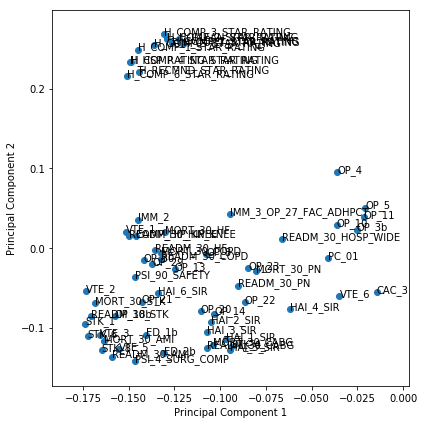

In [39]:
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

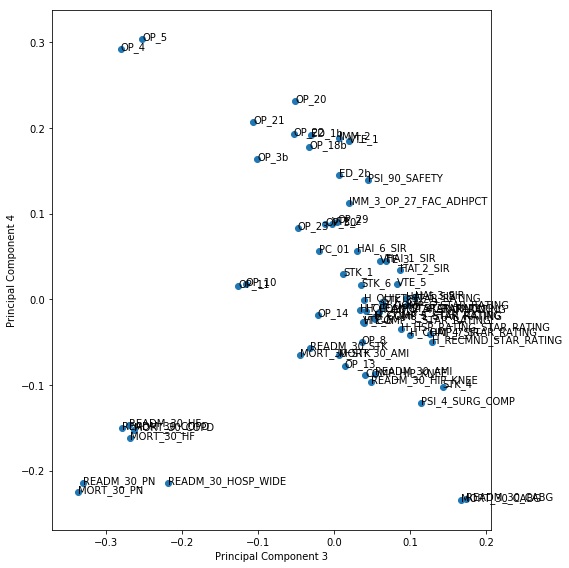

In [40]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(components.PC3, components.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC3[i],components.PC4[i]))
plt.tight_layout()
plt.show()

In [41]:
pca.explained_variance_ratio_

array([0.36852739, 0.11079474, 0.06048094, 0.04234266, 0.02811093,
       0.02294062, 0.01796716, 0.01732042, 0.0161485 , 0.01560164,
       0.01425339, 0.01409652, 0.01334371, 0.01287315, 0.01266079,
       0.01229292, 0.01216176, 0.01161159, 0.01137839, 0.01090423,
       0.01006465, 0.00977812, 0.00936962, 0.00873091, 0.00860013,
       0.00857751, 0.00841478, 0.00799806, 0.00770869, 0.00737826,
       0.00684381, 0.00651779, 0.00617631, 0.00566397, 0.0051439 ,
       0.0045083 , 0.00414118, 0.00389262, 0.00357576, 0.00357126,
       0.00341784, 0.00293298, 0.00269987, 0.00258598, 0.00248253,
       0.00218331, 0.0019495 , 0.0018119 , 0.00170211, 0.00164783,
       0.00155612, 0.00146864, 0.00134461, 0.00129628, 0.00119211,
       0.00116343, 0.00100756, 0.00095622, 0.00081462, 0.00078842,
       0.00071506, 0.00068211, 0.0006541 , 0.00047977])

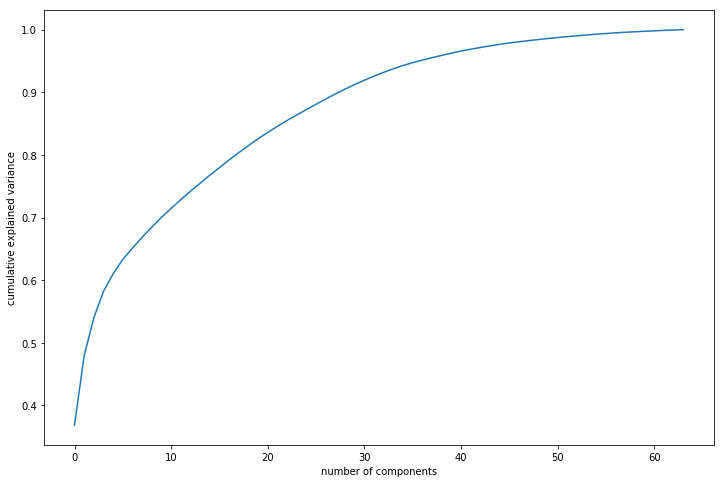

In [42]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [43]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

In [44]:
# Finally obtaining pca with 4 components, df_country_pca
df_hospital_pca = pca_final.fit_transform(Final_clust_df)
df_hospital_pca.shape

(4599, 10)

In [45]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_hospital_pca.transpose())

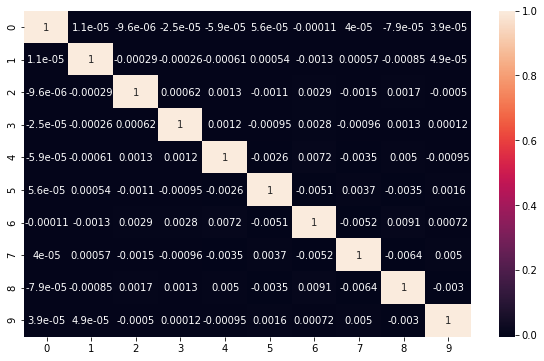

In [46]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(corrmat,annot = True)

In [47]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.009100801596697761 , min corr:  -0.006424822880071308


In [48]:
# converting df_country_pca array obtained after pca into dataframe for further outlier treatment
Hospital_finalpca = pd.DataFrame({'PCA_1':df_hospital_pca[:,0],'PCA_2':df_hospital_pca[:,1],
                                  'PCA_3':df_hospital_pca[:,2],'PCA_4':df_hospital_pca[:,3],
                                  'PCA_5':df_hospital_pca[:,4],'PCA_6':df_hospital_pca[:,5],
                                  'PCA_7':df_hospital_pca[:,6],'PCA_8':df_hospital_pca[:,7],
                                  'PCA_9':df_hospital_pca[:,8],'PCA_10':df_hospital_pca[:,9],})
Hospital_finalpca.head()

PCA_1       PCA_2      PCA_3      PCA_4       PCA_5      PCA_6  \
0  145.360991 -102.922431 -49.653971  61.417108  -19.959546 -41.060936   
1  120.633576 -124.335449  29.336280 -15.082864  -11.376726  94.574037   
2   97.321335 -140.002484 -52.706553   9.824201   29.260548  28.785512   
3  -25.053408   60.122420  62.199244  -2.760305  -46.046609 -37.326314   
4  -94.307565   48.000438  28.052320  34.378609  122.635294 -16.172181   

       PCA_7      PCA_8      PCA_9     PCA_10  
0  54.116193  -0.590472   3.009328  -9.492096  
1  13.881971 -41.176028  -4.155019  -0.892671  
2  39.767821 -16.219718 -42.801377 -39.859955  
3  52.598144  34.053025 -42.324077  17.966578  
4 -10.716873 -11.648822  -4.781977   1.397678

In [49]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
Hospital_finalpca.describe(percentiles=[.05,.25,.5,.75,.90,.95,.99])

PCA_1         PCA_2         PCA_3         PCA_4         PCA_5  \
count  4.599000e+03  4.599000e+03  4.599000e+03  4.599000e+03  4.599000e+03   
mean  -9.923805e-14  6.922249e-15 -6.213966e-15 -1.133253e-15 -6.412884e-15   
std    2.024263e+02  8.201135e+01  6.113766e+01  4.474427e+01  3.901961e+01   
min   -3.216689e+02 -2.411950e+02 -2.478405e+02 -2.010338e+02 -1.283942e+02   
5%    -3.180904e+02 -1.154873e+02 -7.992039e+01 -6.993456e+01 -6.476924e+01   
25%   -1.600176e+02 -5.353554e+01 -5.386930e+01 -2.585983e+01 -2.263117e+01   
50%    4.216862e+01 -9.564725e+00 -7.245244e+00 -4.793387e+00 -2.079819e+00   
75%    1.472407e+02  4.980044e+01  4.829947e+01  2.858952e+01  2.703968e+01   
90%    2.311505e+02  1.029832e+02  8.938101e+01  5.502000e+01  4.620129e+01   
95%    2.825551e+02  1.323121e+02  1.013114e+02  6.955170e+01  5.951707e+01   
99%    4.314717e+02  2.186423e+02  1.151553e+02  1.060266e+02  9.540791e+01   
max    8.206069e+02  7.033562e+02  1.457936e+02  2.168138e+02  1.395741e+02   

              PCA_6         PCA_7         PCA_8         PCA_9        PCA_10  
count  4.599000e+03  4.599000e+03  4.599000e+03  4.599000e+03  4.599000e+03  
mean   1.900729e-15  3.513316e-15 -1.121666e-15 -1.992656e-15  2.654107e-15  
std    3.506533e+01  3.360278e+01  2.947478e+01  2.852588e+01  2.752141e+01  
min   -1.586346e+02 -1.121723e+02 -1.295200e+02 -1.102068e+02 -9.405926e+01  
5%    -5.771889e+01 -4.922299e+01 -5.160881e+01 -4.859646e+01 -4.593030e+01  
25%   -2.241430e+01 -2.514361e+01 -1.594844e+01 -1.649861e+01 -1.337679e+01  
50%    3.117899e+00 -4.039196e-01 -3.158595e-02 -8.378949e-02 -6.988016e-01  
75%    1.814580e+01  2.183198e+01  1.654573e+01  1.559665e+01  1.130614e+01  
90%    4.663108e+01  4.659564e+01  3.698947e+01  3.586125e+01  3.563450e+01  
95%    6.072365e+01  5.771106e+01  4.960200e+01  4.865829e+01  5.220794e+01  
99%    8.394601e+01  7.568809e+01  7.122566e+01  7.168129e+01  7.447214e+01  
max    1.478616e+02  1.442544e+02  1.174967e+02  9.302641e+01  1.204479e+02

In [50]:
# adding column country to country_finalpca dataframe
Hospital_finalpca = pd.concat([Hospital_finalpca, Final_clust_df_copy['Provider ID']], axis=1)
Hospital_finalpca.head()

PCA_1       PCA_2      PCA_3      PCA_4       PCA_5      PCA_6  \
0  145.360991 -102.922431 -49.653971  61.417108  -19.959546 -41.060936   
1  120.633576 -124.335449  29.336280 -15.082864  -11.376726  94.574037   
2   97.321335 -140.002484 -52.706553   9.824201   29.260548  28.785512   
3  -25.053408   60.122420  62.199244  -2.760305  -46.046609 -37.326314   
4  -94.307565   48.000438  28.052320  34.378609  122.635294 -16.172181   

       PCA_7      PCA_8      PCA_9     PCA_10  Provider ID  
0  54.116193  -0.590472   3.009328  -9.492096        10001  
1  13.881971 -41.176028  -4.155019  -0.892671        10005  
2  39.767821 -16.219718 -42.801377 -39.859955        10006  
3  52.598144  34.053025 -42.324077  17.966578        10007  
4 -10.716873 -11.648822  -4.781977   1.397678        10008

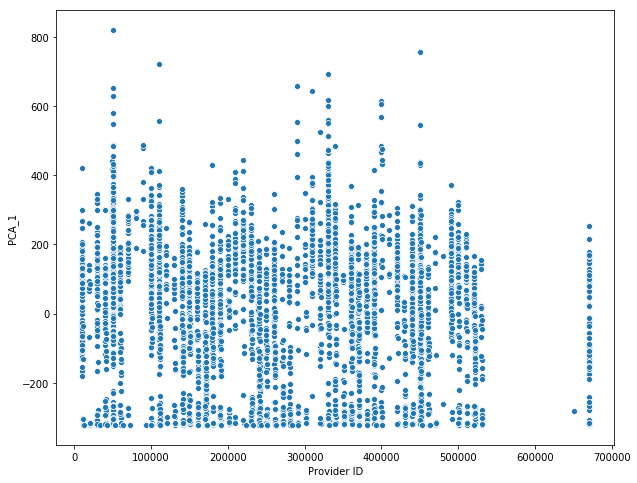

In [51]:
# scatter plot to know the distribution of PCA_1
plt.figure(figsize=(10,8))

ax = sns.scatterplot(x="Provider ID", y="PCA_1", data=Hospital_finalpca)

In [52]:
# calculating 5 and 95th percentiles, max and min values and difference between max and min values from PCA_1
q = Hospital_finalpca["PCA_1"].quantile(0.95)
p = Hospital_finalpca["PCA_1"].quantile(0.05)
print(Hospital_finalpca['PCA_1'].max()-Hospital_finalpca['PCA_1'].min())

1142.275731748322


In [53]:
q = Hospital_finalpca["PCA_2"].quantile(0.95)
p = Hospital_finalpca["PCA_2"].quantile(0.05)
print(Hospital_finalpca['PCA_2'].max()-Hospital_finalpca['PCA_2'].min())

944.5512338269351


In [54]:
q = Hospital_finalpca["PCA_3"].quantile(0.95)
p = Hospital_finalpca["PCA_3"].quantile(0.05)
print(Hospital_finalpca['PCA_3'].max()-Hospital_finalpca['PCA_3'].min())

393.63407501068355


In [55]:
q = Hospital_finalpca["PCA_4"].quantile(0.95)
p = Hospital_finalpca["PCA_4"].quantile(0.05)
print(Hospital_finalpca['PCA_4'].max()-Hospital_finalpca['PCA_4'].min())

417.8476084399241


In [56]:
q = Hospital_finalpca["PCA_5"].quantile(0.95)
p = Hospital_finalpca["PCA_5"].quantile(0.05)
print(Hospital_finalpca['PCA_5'].max()-Hospital_finalpca['PCA_5'].min())

267.96829698653875


In [57]:
q = Hospital_finalpca["PCA_6"].quantile(0.95)
p = Hospital_finalpca["PCA_6"].quantile(0.05)
print(Hospital_finalpca['PCA_6'].max()-Hospital_finalpca['PCA_6'].min())

306.49618879257787


In [58]:
q = Hospital_finalpca["PCA_7"].quantile(0.95)
p = Hospital_finalpca["PCA_7"].quantile(0.05)
print(Hospital_finalpca['PCA_7'].max()-Hospital_finalpca['PCA_7'].min())

256.4266675196473


In [59]:
q = Hospital_finalpca["PCA_8"].quantile(0.95)
p = Hospital_finalpca["PCA_8"].quantile(0.05)
print(Hospital_finalpca['PCA_8'].max()-Hospital_finalpca['PCA_8'].min())

247.01672309010317


In [60]:
q = Hospital_finalpca["PCA_9"].quantile(0.95)
p = Hospital_finalpca["PCA_9"].quantile(0.05)
print(Hospital_finalpca['PCA_9'].max()-Hospital_finalpca['PCA_9'].min())

203.23323386680033


In [61]:
q = Hospital_finalpca["PCA_10"].quantile(0.95)
p = Hospital_finalpca["PCA_10"].quantile(0.05)
print(Hospital_finalpca['PCA_10'].max()-Hospital_finalpca['PCA_10'].min())

214.50712074332142


### removing outliers from PCA_1 and PCA_2

In [62]:
Hospital_finalpca[(Hospital_finalpca["PCA_1"]<=(Hospital_finalpca["PCA_1"].quantile(0.95)))&(Hospital_finalpca["PCA_1"]>=(Hospital_finalpca["PCA_1"].quantile(0.05)))]

PCA_1       PCA_2       PCA_3      PCA_4       PCA_5      PCA_6  \
0     145.360991 -102.922431  -49.653971  61.417108  -19.959546 -41.060936   
1     120.633576 -124.335449   29.336280 -15.082864  -11.376726  94.574037   
2      97.321335 -140.002484  -52.706553   9.824201   29.260548  28.785512   
3     -25.053408   60.122420   62.199244  -2.760305  -46.046609 -37.326314   
4     -94.307565   48.000438   28.052320  34.378609  122.635294 -16.172181   
5     104.208789  -43.991537  -57.255765  51.414912   14.688023   2.703778   
6      40.912405  -86.818756  111.804421 -70.263217   -7.312478 -18.720326   
7     187.672190  -86.577961  -21.485199  36.247608   34.423317 -23.468870   
8      57.137126 -122.018646   44.268970 -16.994191   -8.337539  46.422738   
9     -56.428399    8.031219  111.808354 -13.349142   58.999272   6.010279   
10    -33.901971  128.557308   56.560038  30.861819   34.360885  24.449464   
12    163.545388  -91.862025  -42.964799   7.953662   46.702632  15.461497   
13     97.147841 -109.145581   29.870202   7.403359  -17.609458  31.718724   
14    -32.711297   88.912941   94.093812  54.742877   84.271547  21.105587   
16     23.277889   49.417321  107.783570  -3.261705   54.025349  -3.272514   
17    115.693729  -92.806146   34.052533 -31.873940  -35.553476  57.963261   
18     10.239366  -86.467984   89.585322 -99.185437    7.581414 -21.959494   
19     10.819188  -79.364760   22.525522 -87.010932   43.165554 -67.760534   
20    208.497389  -80.419112  -66.766251  45.322810   34.647926 -10.126176   
21    246.385698   -4.176651  -52.020310  53.997360   -5.681000 -59.931061   
22    -66.285079   48.358378   57.874163 -13.552723  -48.690200 -24.125755   
23    -29.689009   59.724352  100.921744  14.394448   91.535096  23.015942   
24    143.318095  -64.412170  -20.622597  22.738067   54.443473  -9.783214   
25   -165.003697   51.178031  -13.561501  33.221301   19.515945 -43.806389   
26     49.709088  -15.241387  119.154377 -31.310034   11.618367  -0.693700   
27   -129.593594   61.340528   -3.039667  82.273460    5.013100 -73.726537   
28    -71.956157  112.403387   30.684254  43.453146   30.677909  20.799039   
29    110.378328 -160.648383  -39.705593   9.267300   42.952945  21.306845   
30    196.271723  -46.955983  -51.027474  45.529339    1.278892 -17.292715   
31    -65.059532   95.622710    0.193655  65.071823   57.680494 -41.893507   
...          ...         ...         ...        ...         ...        ...   
4536 -318.089114   -7.424342  -61.164497  -9.011948   -3.282792   4.601342   
4537 -298.124856  -17.696900  -28.262932 -25.155365   23.297160  -4.752502   
4538 -291.415493  -22.009763  -17.778284 -31.722650   31.670234  -9.580937   
4540 -308.246779  -10.909468  -46.236238 -19.054381    9.601799   0.436699   
4542 -306.785126   -9.534179  -44.849235 -21.887563   11.645626   1.187531   
4543 -316.458954   -9.643360  -57.328109  -8.479077   -0.908217   3.467224   
4546 -317.774586   -7.852849  -60.422264  -8.908278   -2.822964   4.381835   
4547 -316.932582   -8.998776  -58.442005  -8.633590   -1.597526   3.796484   
4548 -317.195708   -8.640674  -59.060836  -8.719430   -1.980475   3.979406   
4549 -317.564085   -8.139331  -59.927199  -8.839606   -2.516604   4.235497   
4551 -317.353584   -8.425812  -59.432134  -8.770934   -2.210245   4.089159   
4553 -316.985207   -8.927155  -58.565771  -8.650758   -1.674116   3.833068   
4554 -305.671180  -13.146368  -44.041960 -24.431599   11.623598  -4.270195   
4562 -316.669455   -9.356878  -57.823174  -8.547749   -1.214577   3.613562   
4564 -316.722080   -9.285258  -57.946940  -8.564917   -1.291167   3.650146   
4567 -307.954635  -13.546914  -42.446134 -13.964470   11.035121   1.069003   
4568 -314.434722    1.484539    3.102483  -7.243831  -45.852806  53.080320   
4570 -316.406329   -9.714980  -57.204343  -8.461909   -0.831628   3.430640   
4571 -317.353584   -8.425812  -59.432134  -8.770934   -2.210245   4.089159   
4574 -317.248333   -8.569053  -59

In [63]:
# Removing PCA_1 outliers from country_finalpca dataframe
Hospital_finalpca = Hospital_finalpca[(Hospital_finalpca["PCA_1"]<=(Hospital_finalpca["PCA_1"].quantile(0.95)))&(Hospital_finalpca["PCA_1"]>=(Hospital_finalpca["PCA_1"].quantile(0.05)))]
Hospital_finalpca.index = pd.RangeIndex(len(Hospital_finalpca.index))
Hospital_finalpca.shape

(4139, 11)

In [64]:
# Removing PCA_2 outliers from country_finalpca dataframe
Hospital_finalpca = Hospital_finalpca[(Hospital_finalpca["PCA_2"]<=(Hospital_finalpca["PCA_2"].quantile(0.95)))&(Hospital_finalpca["PCA_2"]>=(Hospital_finalpca["PCA_2"].quantile(0.05)))]
Hospital_finalpca.index = pd.RangeIndex(len(Hospital_finalpca.index))
Hospital_finalpca.shape

(3725, 11)

In [65]:
Hospital_finalpca.describe(percentiles=[.05,.25,.5,.75,.90,.95,.99])

PCA_1        PCA_2        PCA_3        PCA_4        PCA_5  \
count  3725.000000  3725.000000  3725.000000  3725.000000  3725.000000   
mean     -6.901621    -8.191578    10.183119    -0.765199    -1.083714   
std     182.606446    61.197852    58.298371    43.217401    40.559339   
min    -318.089114  -118.459003  -159.211341  -185.782168  -128.394170   
5%     -315.262352  -102.142374   -72.105852   -69.904010   -66.329044   
25%    -153.625954   -54.437964   -42.446134   -27.816553   -26.106098   
50%      39.127166   -12.821900     9.588046    -3.237755    -1.939577   
75%     142.506268    36.810401    57.975453    27.705142    25.820609   
90%     205.723261    84.612342    93.875106    53.059168    46.777813   
95%     236.663712   101.088649   103.505434    66.056702    63.692978   
99%     270.786668   120.013720   116.468806    94.293347   103.866911   
max     282.554996   124.571621   137.857743   216.813811   139.574127   

             PCA_6        PCA_7        PCA_8        PCA_9       PCA_10  \
count  3725.000000  3725.000000  3725.000000  3725.000000  3725.000000   
mean     -1.700376     2.888652     0.386956     0.317626     0.299527   
std      34.903721    32.392658    29.610729    28.762183    28.079138   
min    -158.634570  -100.647701  -124.746291  -110.206827   -94.059261   
5%      -58.554658   -47.263877   -50.196973   -48.445761   -46.603482   
25%     -24.424934   -23.039172   -16.639285   -17.192342   -13.946164   
50%      -0.149269     1.735141     1.494938     0.764705     1.324890   
75%      17.527547    24.346501    17.162542    16.192393    12.169087   
90%      46.005271    48.523392    37.067095    35.625344    36.685525   
95%      59.327686    58.478431    50.732846    49.023027    52.720178   
99%      78.758698    79.273192    71.229526    72.059413    76.415749   
max     121.644083   144.254355   117.496741    93.026407   120.447859   

         Provider ID  
count    3725.000000  
mean   268174.648054  
std    156320.906941  
min     10001.000000  
5%      41307.200000  
25%    140240.000000  
50%    251300.000000  
75%    390145.000000  
90%    460059.200000  
95%    511056.400000  
99%    670052.280000  
max    670112.000000

In [66]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [67]:
HospitalFinal_cluster= Hospital_finalpca.drop(['Provider ID'],axis=1)
HospitalFinal_cluster.shape

(3725, 10)

In [68]:
hopkins(HospitalFinal_cluster)

0.8624526909351286

## K Mean

In [69]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans
# Kmeans with K=4
model_clus1 = KMeans(n_clusters = 5, max_iter=50,random_state=0)
model_clus1.fit(HospitalFinal_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

## Silhouette Analysis

In [70]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(HospitalFinal_cluster)
    sse_.append([k, silhouette_score(HospitalFinal_cluster, kmeans.labels_)])

In [71]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

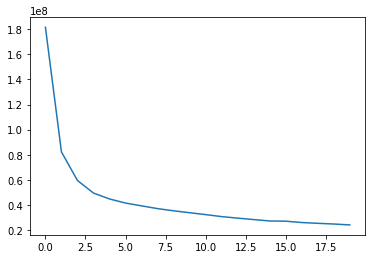

In [72]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(HospitalFinal_cluster)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [73]:
# analysis of clusters formed using 4 cluster
HospitalFinal_cluster.index = pd.RangeIndex(len(HospitalFinal_cluster.index))
HospitalFinal_km = pd.concat([HospitalFinal_cluster, pd.Series(model_clus1.labels_)], axis=1)
HospitalFinal_km.columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4','PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
                           'PCA_7', 'PCA_8', 'ClusterID']

In [74]:
print(HospitalFinal_km.head())
print(HospitalFinal_km.shape)

        PCA_1       PCA_2       PCA_3      PCA_4       PCA_5      PCA_6  \
0  145.360991 -102.922431  -49.653971  61.417108  -19.959546 -41.060936   
1  -25.053408   60.122420   62.199244  -2.760305  -46.046609 -37.326314   
2  -94.307565   48.000438   28.052320  34.378609  122.635294 -16.172181   
3  104.208789  -43.991537  -57.255765  51.414912   14.688023   2.703778   
4   40.912405  -86.818756  111.804421 -70.263217   -7.312478 -18.720326   

       PCA_7      PCA_8      PCA_7      PCA_8  ClusterID  
0  54.116193  -0.590472   3.009328  -9.492096          3  
1  52.598144  34.053025 -42.324077  17.966578          4  
2 -10.716873 -11.648822  -4.781977   1.397678          4  
3  22.237327 -45.101622 -24.199021 -42.798092          3  
4 -49.431401 -22.135471  16.364801  15.115920          2  
(3725, 11)


In [75]:
# adding column Provider ID to HospitalFinal_km dataframe
HospitalFinal_km_cluster5 = pd.concat([HospitalFinal_km, Hospital_finalpca['Provider ID']], axis=1)
HospitalFinal_km_cluster5.shape

(3725, 12)

In [76]:
# merging HospitalFinal_km_cluster5 dataframe to Final_clust_df_copy dataframe
Hospital_cluster5 = pd.merge(HospitalFinal_km_cluster5, Final_clust_df_copy, how='inner', on='Provider ID')
Hospital_cluster5.head()

PCA_1       PCA_2       PCA_3      PCA_4       PCA_5      PCA_6  \
0  145.360991 -102.922431  -49.653971  61.417108  -19.959546 -41.060936   
1  -25.053408   60.122420   62.199244  -2.760305  -46.046609 -37.326314   
2  -94.307565   48.000438   28.052320  34.378609  122.635294 -16.172181   
3  104.208789  -43.991537  -57.255765  51.414912   14.688023   2.703778   
4   40.912405  -86.818756  111.804421 -70.263217   -7.312478 -18.720326   

       PCA_7      PCA_8      PCA_7      PCA_8  ...  H_COMP_6_STAR_RATING  \
0  54.116193  -0.590472   3.009328  -9.492096  ...                   3.0   
1  52.598144  34.053025 -42.324077  17.966578  ...                   3.0   
2 -10.716873 -11.648822  -4.781977   1.397678  ...                   0.0   
3  22.237327 -45.101622 -24.199021 -42.798092  ...                   3.0   
4 -49.431401 -22.135471  16.364801  15.115920  ...                   4.0   

   H_COMP_7_STAR_RATING  H_HSP_RATING_STAR_RATING  H_QUIET_STAR_RATING  \
0                   3.0                       4.0                  4.0   
1                   3.0                       3.0                  5.0   
2                   0.0                       0.0                  0.0   
3                   2.0                       3.0                  3.0   
4                   2.0                       4.0                  4.0   

   H_RECMND_STAR_RATING  OP_10  OP_11  OP_13  OP_14  OP_8  
0                   4.0    6.4    0.9    7.1    2.4  38.1  
1                   3.0   24.3    6.1    0.0    0.0   0.0  
2                   0.0    3.6    0.0    0.0    0.6   0.0  
3                   3.0    2.4   10.4    0.0    3.4  36.2  
4                   2.0    6.1   10.8    3.1    0.0   0.0  

[5 rows x 76 columns]

In [77]:
print(Hospital_cluster5.shape)
print(Hospital_cluster5.isnull().sum())

(3725, 76)
PCA_1                       0
PCA_2                       0
PCA_3                       0
PCA_4                       0
PCA_5                       0
PCA_6                       0
PCA_7                       0
PCA_8                       0
PCA_7                       0
PCA_8                       0
ClusterID                   0
Provider ID                 0
MORT_30_AMI                 0
MORT_30_CABG                0
MORT_30_COPD                0
MORT_30_HF                  0
MORT_30_PN                  0
MORT_30_STK                 0
PSI_4_SURG_COMP             0
READM_30_AMI                0
READM_30_CABG               0
READM_30_COPD               0
READM_30_HF                 0
READM_30_HIP_KNEE           0
READM_30_HOSP_WIDE          0
READM_30_PN                 0
READM_30_STK                0
ED_1b                       0
ED_2b                       0
OP_18b                      0
                           ..
OP_23                       0
OP_29                       0

## Kmean analysis for all columns per cluster

In [78]:
# merging HospitalFinal_km_cluster5 dataframe to Final_df_targetScore dataframe to get final group scores
Hospital_cluster5 = pd.merge(HospitalFinal_km_cluster5, Final_df_targetScore, how='inner', on='Provider ID')
Hospital_cluster5.head()

PCA_1       PCA_2       PCA_3      PCA_4       PCA_5      PCA_6  \
0  145.360991 -102.922431  -49.653971  61.417108  -19.959546 -41.060936   
1  -25.053408   60.122420   62.199244  -2.760305  -46.046609 -37.326314   
2  -94.307565   48.000438   28.052320  34.378609  122.635294 -16.172181   
3  104.208789  -43.991537  -57.255765  51.414912   14.688023   2.703778   
4   40.912405  -86.818756  111.804421 -70.263217   -7.312478 -18.720326   

       PCA_7      PCA_8      PCA_7      PCA_8  ClusterID  Provider ID  \
0  54.116193  -0.590472   3.009328  -9.492096          3        10001   
1  52.598144  34.053025 -42.324077  17.966578          4        10007   
2 -10.716873 -11.648822  -4.781977   1.397678          4        10008   
3  22.237327 -45.101622 -24.199021 -42.798092          3        10011   
4 -49.431401 -22.135471  16.364801  15.115920          2        10012   

   Efficiency_score  Mort_score  Readmission_score  Patent_exp_score  \
0          0.059312    0.770402           0.452650            0.0620   
1          0.142456    0.319597           0.356758            0.0718   
2          0.018912    0.212457           0.309843            0.0000   
3          0.059424    0.748459           0.432025            0.0508   
4          0.057016    0.417497           0.417148            0.0630   

   SafetyOfCare_score  EffectivenessOfCare_score  TimelinessOfCare_score  
0            0.032950                   0.134511                0.779029  
1            0.014121                   0.076333                0.599543  
2            0.016088                   0.047244                0.470971  
3            0.033988                   0.098000                0.733314  
4            0.025328                   0.158267                0.515600

In [79]:
Final_df_targetScore.head()

Provider ID  Efficiency_score  Mort_score  Readmission_score  \
0        10001          0.059312    0.770402           0.452650   
1        10005          0.120216    0.839457           0.411290   
2        10006          0.101424    0.897487           0.438130   
3        10007          0.142456    0.319597           0.356758   
4        10008          0.018912    0.212457           0.309843   

   Patent_exp_score  SafetyOfCare_score  EffectivenessOfCare_score  \
0            0.0620            0.032950                   0.134511   
1            0.0630            0.028284                   0.154800   
2            0.0538            0.031450                   0.127978   
3            0.0718            0.014121                   0.076333   
4            0.0000            0.016088                   0.047244   

   TimelinessOfCare_score  
0                0.779029  
1                0.604457  
2                0.578571  
3                0.599543  
4                0.470971

In [80]:
Hospital_cluster5_Efficiency_score = pd.DataFrame(Hospital_cluster5.groupby(["ClusterID"]).Efficiency_score.mean())
Hospital_cluster5_Mort_score = pd.DataFrame(Hospital_cluster5.groupby(["ClusterID"]).Mort_score.mean())
Hospital_cluster5_Readmission_score = pd.DataFrame(Hospital_cluster5.groupby(["ClusterID"]).Readmission_score.mean())
Hospital_cluster5_Patent_exp_score = pd.DataFrame(Hospital_cluster5.groupby(["ClusterID"]).Patent_exp_score.mean())
Hospital_cluster5_SafetyOfCare_score = pd.DataFrame(Hospital_cluster5.groupby(["ClusterID"]).SafetyOfCare_score.mean())
Hospital_cluster5_EffectivenessOfCare_score = pd.DataFrame(Hospital_cluster5.groupby(["ClusterID"]).EffectivenessOfCare_score.mean())
Hospital_cluster5_TimelinessOfCare_score = pd.DataFrame(Hospital_cluster5.groupby(["ClusterID"]).TimelinessOfCare_score.mean())


In [81]:
km_clusters5_final= pd.concat([pd.Series([0,1,2,3,4,5,6]), 
                               Hospital_cluster5_Efficiency_score, Hospital_cluster5_Mort_score, 
                               Hospital_cluster5_Readmission_score,Hospital_cluster5_Patent_exp_score,
                               Hospital_cluster5_SafetyOfCare_score,Hospital_cluster5_EffectivenessOfCare_score,
                               Hospital_cluster5_TimelinessOfCare_score], axis=1)
km_clusters5_final.columns = ["ClusterID", "Efficiency_score","Mort_score","Readmission_score",
                              "Patent_exp_score","SafetyOfCare_score","EffectivenessOfCare_score",
                              "TimelinessOfCare_score"]
km_clusters5_final

ClusterID  Efficiency_score  Mort_score  Readmission_score  \
0          0          0.031892    0.129783           0.196214   
1          1          0.057528    0.648528           0.426334   
2          2          0.058958    0.290386           0.360797   
3          3          0.065987    0.673131           0.428302   
4          4          0.052636    0.198813           0.274526   
5          5               NaN         NaN                NaN   
6          6               NaN         NaN                NaN   

   Patent_exp_score  SafetyOfCare_score  EffectivenessOfCare_score  \
0          0.028014            0.006419                   0.016359   
1          0.055430            0.029693                   0.145327   
2          0.062454            0.023316                   0.124355   
3          0.061351            0.028761                   0.139454   
4          0.048023            0.011993                   0.050212   
5               NaN                 NaN                        NaN   
6               NaN                 NaN                        NaN   

   TimelinessOfCare_score  
0                0.066828  
1                0.920236  
2                0.637021  
3                0.677944  
4                0.471081  
5                     NaN  
6                     NaN

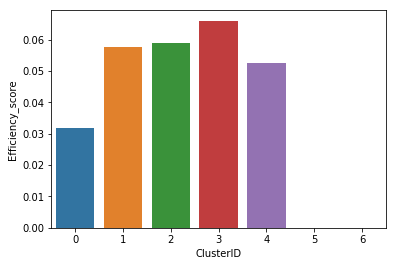

In [82]:
sns.barplot(x=km_clusters5_final.ClusterID, y=km_clusters5_final.Efficiency_score)

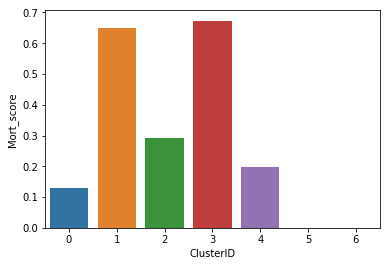

In [83]:
sns.barplot(x=km_clusters5_final.ClusterID, y=km_clusters5_final.Mort_score)

In [84]:
sns.barplot(x=km_clusters5_final.ClusterID, y=km_clusters5_final.Readmission_score)

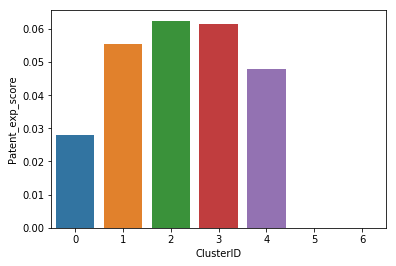

In [85]:
sns.barplot(x=km_clusters5_final.ClusterID, y=km_clusters5_final.Patent_exp_score)

In [86]:
sns.barplot(x=km_clusters5_final.ClusterID, y=km_clusters5_final.SafetyOfCare_score)

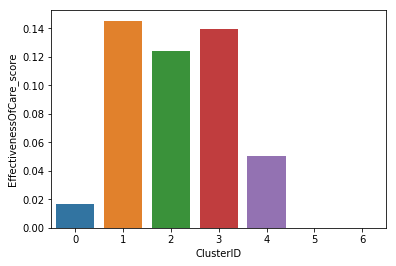

In [87]:
sns.barplot(x=km_clusters5_final.ClusterID, y=km_clusters5_final.EffectivenessOfCare_score)

In [88]:
sns.barplot(x=km_clusters5_final.ClusterID, y=km_clusters5_final.TimelinessOfCare_score)

## Looks like cluster 1 is the least rated hospital (rating 1) 

In [89]:
print('cluster 1 hospitals (count):', (Hospital_cluster5['Provider ID'][Hospital_cluster5['ClusterID']==1]).count())

print('cluster 1 hospitals:', Hospital_cluster5['Provider ID'][Hospital_cluster5['ClusterID']==1])

cluster 1 hospitals (count): 636
cluster 1 hospitals: 14       10039
15       10040
23       10056
38       10092
42       10100
45       10103
49       10113
63       10149
72       20001
77       20026
83       30006
86       30013
89       30023
92       30036
93       30037
94       30043
98       30065
101      30085
102      30088
103      30089
107      30101
111      30115
116      30121
190      50002
193      50009
195      50014
196      50017
198      50022
201      50030
202      50038
         ...  
3154    500054
3155    500058
3157    500077
3158    500079
3160    500088
3163    500129
3165    500141
3167    500151
3192    510001
3198    510022
3201    510029
3209    510050
3212    510062
3325    530014
3343    670023
3344    670024
3346    670031
3351    670055
3358    670075
3433    190006
3604    210011
3608    210022
3609    210024
3611    210028
3616    210038
3618    210040
3622    210055
3623    210056
3626    210062
3627    210063
Name: Provider ID, Length: 636,